In [1]:
%matplotlib inline
% timeit

import numpy as np
import iris
import iris.plot as iplt
import os
import sys
import seaborn
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import platform
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt

# print the system structure and the path of the kernal
print (platform.architecture())
print (os.path)

('64bit', '')
<module 'posixpath' from '/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/posixpath.py'>


Specify the paths for input mask files and output netcdf files

In [2]:
mask_ORAS4 = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/ORAS4'
mask_GLORYS2V3 = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/GLORYS2V3'
mask_SODA3 = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/SODA3'
output_path = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/land_sea_mask'

Take the original land-sea mask and 

In [3]:
# land-sea mask
mesh_mask_ORAS4 = Dataset(mask_ORAS4 + os.sep + 'mesh_mask.nc')
mesh_mask_GLORYS2V3 = Dataset(mask_GLORYS2V3 + os.sep + 'G2V3_mesh_mask_myocean.nc')
mesh_mask_SODA3 = Dataset(mask_SODA3 + os.sep + 'topog.nc')
# individual sea/ocean mask
ocean_mask_ORAS4 = Dataset(mask_ORAS4 + os.sep + 'basinmask_050308_UKMO.nc')
ocean_mask_GLORYS2V3 = Dataset(mask_GLORYS2V3 + os.sep + 'new_maskglo.nc')
# lat and lon of T grid
lat_ORAS4 =  mesh_mask_ORAS4.variables['nav_lat'][:]
lat_GLORYS2V3 =  mesh_mask_GLORYS2V3.variables['nav_lat'][:]
lat_SODA3 =  mesh_mask_SODA3.variables['y_T'][:]

lon_ORAS4 =  mesh_mask_ORAS4.variables['nav_lon'][:]
lon_GLORYS2V3 =  mesh_mask_GLORYS2V3.variables['nav_lon'][:]
lon_SODA3 =  mesh_mask_SODA3.variables['x_T'][:]

SODA3 is different from the other 2. MOM5 grid has a longitude from -280 to +80. <br>
In order to determine the mask, we have to make it to a readable form. <br>
We change it to -180 to +180. This is only for reading. DO NOT USE IT FOR PLOT. <br>

In [4]:
aux_lon_SODA3 = lon_SODA3
aux_lon_SODA3[aux_lon_SODA3<-180] = aux_lon_SODA3[aux_lon_SODA3<-180] + 360

Take the original t mask as the canvas. We take the land-sea mask for atlantic and pacific as well.

In [5]:
# tmask
tmask_ORAS4 = mesh_mask_ORAS4.variables['tmask'][0,0,:,:]
tmask_GLORYS2V3 = mesh_mask_GLORYS2V3.variables['tmask'][0,0,:,:]
tmask_SODA3 = mesh_mask_SODA3.variables['wet'][:]
# sea/ocean mask
# Atlantic
tmaskatl_ORAS4 = ocean_mask_ORAS4.variables['tmaskatl'][:]
tmaskatl_GLORYS2V3 = ocean_mask_GLORYS2V3.variables['tmaskatl'][:,1:-1] # attention that the size is different!

tmaskpac_ORAS4 = ocean_mask_ORAS4.variables['tmaskpac'][:]
tmaskpac_GLORYS2V3 = ocean_mask_GLORYS2V3.variables['tmaskpac'][:,1:-1]

Modify the mask for Atlantic <br>
The border for the Atlantic is defined as: <br>
North: 70 West:-98 South:-55 East:20 <br>
The border for the Mediterranean is defined as: <br>
North: 45 West:-5 South:30 East:30 <br>

In [6]:
# small correction to the ORAS4 atlantic mask
tmaskatl_ORAS4[lat_ORAS4>70] = 0
tmaskatl_ORAS4[:,107:190] = 0
tmaskatl_ORAS4[:,308:361] = 0
tmaskatl_ORAS4[237:290,308:329] = 0
tmaskatl_ORAS4[65:98,216:308] = tmask_ORAS4[65:98,216:308]
# correction Mediterranean
tmaskatl_ORAS4[193:211,282:330] = 0
tmaskatl_ORAS4[210:240,290:317] = 0
# small correction to the GLORYS atlantic mask
tmaskatl_GLORYS2V3[lat_GLORYS2V3>70] = 0
# calculate the atlantic land sea mask
tmaskatl_SODA3 = np.zeros(tmask_SODA3.shape,dtype=int)
tmaskatl_SODA3[:] = tmask_SODA3
tmaskatl_SODA3[0:225,:] = 0 # boundary south
tmaskatl_SODA3[:,0:727] = 0 # boundary west
tmaskatl_SODA3[:,1200:] = 0 # boundary east
tmaskatl_SODA3[lat_SODA3>70] = 0 # boundary north
# correction Mediterranean
tmaskatl_SODA3[614:680,1100:1240] = 0
tmaskatl_SODA3[660:720,1140:1280] = 0
# correction Pacific
tmaskatl_SODA3[225:522,759:839] = 0
tmaskatl_SODA3[225:545,670:780] = 0
tmaskatl_SODA3[225:560,670:759] = 0

Plot the land-sea mask for the atlantic ocean in ORAS4

/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/analysis/cartography.py:597: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '


Atlantic land sea mask / (1)        (projection_y_coordinate: 360; projection_x_coordinate: 720)
     Dimension coordinates:
          projection_y_coordinate                           x                             -
          projection_x_coordinate                           -                             x
     Auxiliary coordinates:
          latitude                                          x                             x
          longitude                                         x                             x


/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


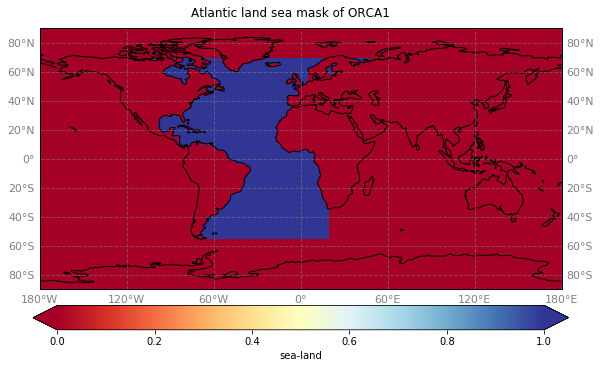

In [10]:
# define the cube for the use of iris package
latitude_ORAS4 = iris.coords.AuxCoord(lat_ORAS4,standard_name='latitude',units='degrees')
longitude_ORAS4 = iris.coords.AuxCoord(lon_ORAS4,standard_name='longitude',units='degrees')
cube_ORAS4_atlantic = iris.cube.Cube(tmaskatl_ORAS4,long_name='Atlantic land sea mask', var_name='mask',
                            units='1',aux_coords_and_dims=[(latitude_ORAS4,(0,1)),(longitude_ORAS4,(0,1))])
#print cube_ORAS4
# Transform cube to target projection
cube_ORAS4_atlantic_regrid, extent = iris.analysis.cartography.project(cube_ORAS4_atlantic, ccrs.PlateCarree(), nx=720, ny=360)
# interpolation complete!!
print (cube_ORAS4_atlantic_regrid)

# plot
fig1 = plt.figure(figsize=(12,6))
fig1.suptitle('Atlantic land sea mask of ORCA1',fontsize = 12,y=0.93)

# Set up axes
ax = plt.axes(projection=ccrs.PlateCarree())

# Set limits
ax.set_global()
#ax.set_extent([-180,180,90,90],ccrs.PlateCarree()) # East, West, South, Nouth

# adjust map by data coverage (function from matplotlib)
# could make the map an ellipse
#ax.set_aspect('auto')
ax.set_aspect('1')

# Draw coastlines
ax.coastlines()

# set gridlines and ticks
# options of crs and draw_labels only work for PlateCarree() and Mercator()
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5,linestyle='--')
gl.xlabels_top = False
gl.xlabel_style = {'size': 11, 'color': 'gray'}
#gl.xlines = False
#gl.set_xticks()
#gl.set_yticks()
gl.xformatter = LONGITUDE_FORMATTER
gl.ylabel_style = {'size': 11, 'color': 'gray'}
#ax.ylabels_left = False
gl.yformatter = LATITUDE_FORMATTER

# plot with Iris quickplot pcolormesh
#cs = iplt.pcolormesh(cube_ORAS4_atlantic_regrid,cmap='coolwarm',vmin=0,vmax=1)
cs = iplt.pcolormesh(cube_ORAS4_atlantic_regrid,cmap='RdYlBu',vmin=0,vmax=1)
cbar = fig1.colorbar(cs,extend='both',orientation='horizontal',shrink =0.8,pad=0.05)
cbar.set_label('sea-land')

# show and save plot
iplt.show()
fig1.savefig(output_path + os.sep + 'atlantic_mask_ORAS4.jpg',dpi = 400)

Plot the land-sea mask for the atlantic ocean in GLORYS2V3

/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/analysis/cartography.py:597: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '


Atlantic land sea mask / (1)        (projection_y_coordinate: 900; projection_x_coordinate: 1440)
     Dimension coordinates:
          projection_y_coordinate                           x                             -
          projection_x_coordinate                           -                             x
     Auxiliary coordinates:
          latitude                                          x                             x
          longitude                                         x                             x


/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


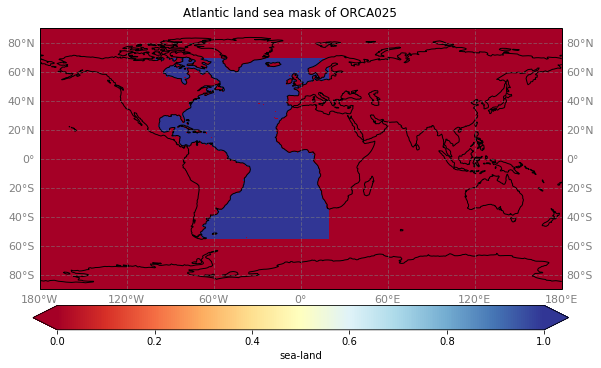

In [11]:
# define the cube for the use of iris package
latitude_GLORYS2V3 = iris.coords.AuxCoord(lat_GLORYS2V3,standard_name='latitude',units='degrees')
longitude_GLORYS2V3 = iris.coords.AuxCoord(lon_GLORYS2V3,standard_name='longitude',units='degrees')
cube_GLORYS2V3_atlantic = iris.cube.Cube(tmaskatl_GLORYS2V3,long_name='Atlantic land sea mask', var_name='mask',
                            units='1',aux_coords_and_dims=[(latitude_GLORYS2V3,(0,1)),(longitude_GLORYS2V3,(0,1))])
#print cube_ORAS4
# Transform cube to target projection
cube_GLORYS2V3_atlantic_regrid, extent = iris.analysis.cartography.project(cube_GLORYS2V3_atlantic, ccrs.PlateCarree(), nx=1440, ny=900)
# interpolation complete!!
print (cube_GLORYS2V3_atlantic_regrid)

# plot
fig2 = plt.figure(figsize=(12,6))
fig2.suptitle('Atlantic land sea mask of ORCA025',fontsize = 12,y=0.93)

# Set up axes
ax = plt.axes(projection=ccrs.PlateCarree())

# Set limits
ax.set_global()
#ax.set_extent([-180,180,90,90],ccrs.PlateCarree()) # East, West, South, Nouth

# adjust map by data coverage (function from matplotlib)
# could make the map an ellipse
#ax.set_aspect('auto')
ax.set_aspect('1')

# Draw coastlines
ax.coastlines()

# set gridlines and ticks
# options of crs and draw_labels only work for PlateCarree() and Mercator()
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5,linestyle='--')
gl.xlabels_top = False
gl.xlabel_style = {'size': 11, 'color': 'gray'}
#gl.xlines = False
#gl.set_xticks()
#gl.set_yticks()
gl.xformatter = LONGITUDE_FORMATTER
gl.ylabel_style = {'size': 11, 'color': 'gray'}
#ax.ylabels_left = False
gl.yformatter = LATITUDE_FORMATTER

# plot with Iris quickplot pcolormesh
#cs = iplt.pcolormesh(cube_GLORYS2V3_atlantic_regrid,cmap='coolwarm',vmin=0,vmax=1)
cs = iplt.pcolormesh(cube_GLORYS2V3_atlantic_regrid,cmap='RdYlBu',vmin=0,vmax=1)
cbar = fig2.colorbar(cs,extend='both',orientation='horizontal',shrink =0.8,pad=0.05)
cbar.set_label('sea-land')

# show and save plot
iplt.show()
fig2.savefig(output_path + os.sep + 'atlantic_mask_GLORYS2V3.jpg',dpi = 400)

/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/analysis/cartography.py:597: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '


Atlantic land sea mask / (1)        (projection_y_coordinate: 900; projection_x_coordinate: 1440)
     Dimension coordinates:
          projection_y_coordinate                           x                             -
          projection_x_coordinate                           -                             x
     Auxiliary coordinates:
          latitude                                          x                             x
          longitude                                         x                             x


/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


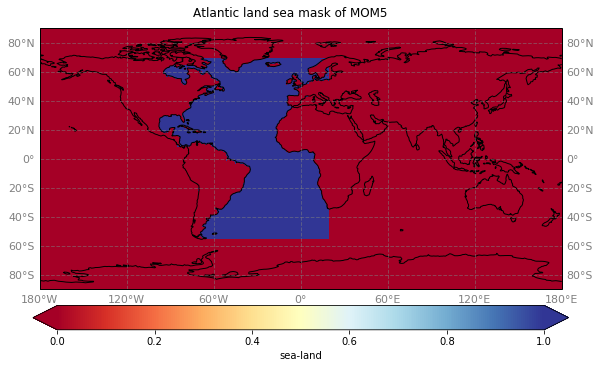

In [12]:
# define the cube for the use of iris package
latitude_SODA3 = iris.coords.AuxCoord(lat_SODA3,standard_name='latitude',units='degrees')
longitude_SODA3 = iris.coords.AuxCoord(lon_SODA3,standard_name='longitude',units='degrees')
cube_SODA3_atlantic = iris.cube.Cube(tmaskatl_SODA3,long_name='Atlantic land sea mask', var_name='mask',
                            units='1',aux_coords_and_dims=[(latitude_SODA3,(0,1)),(longitude_SODA3,(0,1))])
#print cube_ORAS4
# Transform cube to target projection
cube_SODA3_atlantic_regrid, extent = iris.analysis.cartography.project(cube_SODA3_atlantic, ccrs.PlateCarree(), nx=1440, ny=900)
# interpolation complete!!
print (cube_SODA3_atlantic_regrid)

# plot
fig3 = plt.figure(figsize=(12,6))
fig3.suptitle('Atlantic land sea mask of MOM5',fontsize = 12,y=0.93)

# Set up axes
ax = plt.axes(projection=ccrs.PlateCarree())

# Set limits
ax.set_global()
#ax.set_extent([-180,180,90,90],ccrs.PlateCarree()) # East, West, South, Nouth

# adjust map by data coverage (function from matplotlib)
# could make the map an ellipse
#ax.set_aspect('auto')
ax.set_aspect('1')

# Draw coastlines
ax.coastlines()

# set gridlines and ticks
# options of crs and draw_labels only work for PlateCarree() and Mercator()
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5,linestyle='--')
gl.xlabels_top = False
gl.xlabel_style = {'size': 11, 'color': 'gray'}
#gl.xlines = False
#gl.set_xticks()
#gl.set_yticks()
gl.xformatter = LONGITUDE_FORMATTER
gl.ylabel_style = {'size': 11, 'color': 'gray'}
#ax.ylabels_left = False
gl.yformatter = LATITUDE_FORMATTER

# plot with Iris quickplot pcolormesh
#cs = iplt.pcolormesh(cube_GLORYS2V3_atlantic_regrid,cmap='coolwarm',vmin=0,vmax=1)
cs = iplt.pcolormesh(cube_SODA3_atlantic_regrid,cmap='RdYlBu',vmin=0,vmax=1)
cbar = fig3.colorbar(cs,extend='both',orientation='horizontal',shrink =0.8,pad=0.05)
cbar.set_label('sea-land')

# show and save plot
iplt.show()
fig3.savefig(output_path + os.sep + 'atlantic_mask_SODA3.jpg',dpi = 400)

Modify the mask for Pacific <br>
The border for the Pacific is defined as:  <br>
North:65  West:120 South:-55 East:-70 <br>

In [7]:
# calculate the pacific land sea mask
# ORAS4
tmaskpac_ORAS4[66:146,58:218] = tmask_ORAS4[66:146,58:218]
# GLORYS2V3
# SODA3
tmaskpac_SODA3 = np.zeros(tmask_SODA3.shape,dtype=int)
tmaskpac_SODA3[:] = tmask_SODA3
tmaskpac_SODA3[lat_SODA3>65] = 0
tmaskpac_SODA3[lat_SODA3<-54] = 0
tmaskpac_SODA3[615:,710:1300] = 0
tmaskpac_SODA3[190:616,857:] = 0
tmaskpac_SODA3[180:312,836:915] = 0
tmaskpac_SODA3[190:616,:106] = 0
tmaskpac_SODA3[:516,:152] = 0
tmaskpac_SODA3[:448,:201] = 0
tmaskpac_SODA3[555:618,716:877] = 0
tmaskpac_SODA3[535:560,772:899] = 0
tmaskpac_SODA3[525:545,780:899] = 0


/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/analysis/cartography.py:597: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '


Pacific land sea mask / (1)         (projection_y_coordinate: 360; projection_x_coordinate: 720)
     Dimension coordinates:
          projection_y_coordinate                           x                             -
          projection_x_coordinate                           -                             x
     Auxiliary coordinates:
          latitude                                          x                             x
          longitude                                         x                             x


/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


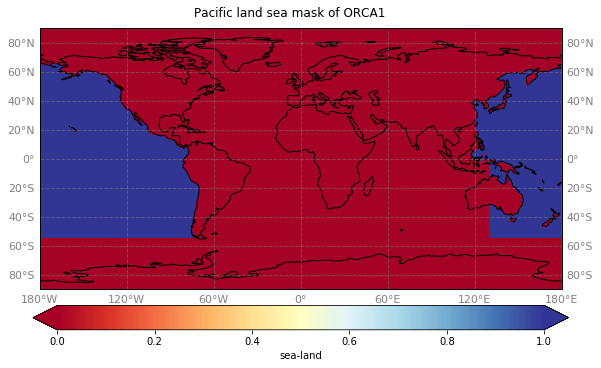

In [15]:
cube_ORAS4_pacific = iris.cube.Cube(tmaskpac_ORAS4,long_name='Pacific land sea mask', var_name='mask',
                                  units='1',aux_coords_and_dims=[(latitude_ORAS4,(0,1)),(longitude_ORAS4,(0,1))])
#print cube_ORAS4
# Transform cube to target projection
cube_ORAS4_pacific_regrid, extent = iris.analysis.cartography.project(cube_ORAS4_pacific, ccrs.PlateCarree(), nx=720, ny=360)
# interpolation complete!!
print (cube_ORAS4_pacific_regrid)

# plot
fig4 = plt.figure(figsize=(12,6))
fig4.suptitle('Pacific land sea mask of ORCA1',fontsize = 12,y=0.93)

# Set up axes
ax = plt.axes(projection=ccrs.PlateCarree())

# Set limits
ax.set_global()
#ax.set_extent([-180,180,90,90],ccrs.PlateCarree()) # East, West, South, Nouth

# adjust map by data coverage (function from matplotlib)
# could make the map an ellipse
#ax.set_aspect('auto')
ax.set_aspect('1')

# Draw coastlines
ax.coastlines()

# set gridlines and ticks
# options of crs and draw_labels only work for PlateCarree() and Mercator()
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5,linestyle='--')
gl.xlabels_top = False
gl.xlabel_style = {'size': 11, 'color': 'gray'}
#gl.xlines = False
#gl.set_xticks()
#gl.set_yticks()
gl.xformatter = LONGITUDE_FORMATTER
gl.ylabel_style = {'size': 11, 'color': 'gray'}
#ax.ylabels_left = False
gl.yformatter = LATITUDE_FORMATTER

# plot with Iris quickplot pcolormesh
#cs = iplt.pcolormesh(cube_ORAS4_globe_regrid,cmap='coolwarm',vmin=0,vmax=1)
cs = iplt.pcolormesh(cube_ORAS4_pacific_regrid,cmap='RdYlBu',vmin=0,vmax=1)
cbar = fig4.colorbar(cs,extend='both',orientation='horizontal',shrink =0.8,pad=0.05)
cbar.set_label('sea-land')

# show and save plot
iplt.show()
fig4.savefig(output_path + os.sep + 'pacific_mask_ORAS4.jpg',dpi = 400)

/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/analysis/cartography.py:597: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '


Pacific land sea mask / (1)         (projection_y_coordinate: 900; projection_x_coordinate: 1440)
     Dimension coordinates:
          projection_y_coordinate                           x                             -
          projection_x_coordinate                           -                             x
     Auxiliary coordinates:
          latitude                                          x                             x
          longitude                                         x                             x


/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


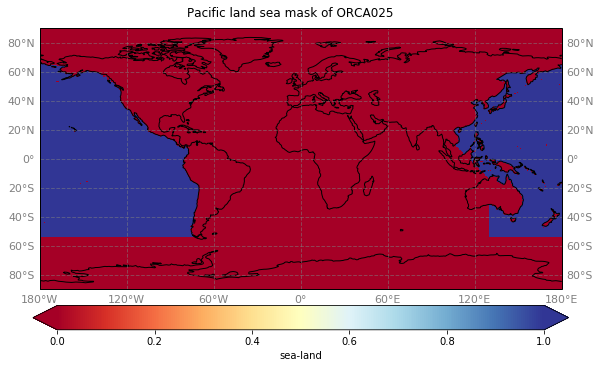

In [16]:
cube_GLORYS2V3_pacific = iris.cube.Cube(tmaskpac_GLORYS2V3,long_name='Pacific land sea mask', var_name='mask',
                            units='1',aux_coords_and_dims=[(latitude_GLORYS2V3,(0,1)),(longitude_GLORYS2V3,(0,1))])
#print cube_GLORYS2V3
# Transform cube to target projection
cube_GLORYS2V3_pacific_regrid, extent = iris.analysis.cartography.project(cube_GLORYS2V3_pacific, ccrs.PlateCarree(), nx=1440, ny=900)
# interpolation complete!!
print (cube_GLORYS2V3_pacific_regrid)

# plot
fig5 = plt.figure(figsize=(12,6))
fig5.suptitle('Pacific land sea mask of ORCA025',fontsize = 12,y=0.93)

# Set up axes
ax = plt.axes(projection=ccrs.PlateCarree())

# Set limits
ax.set_global()
#ax.set_extent([-180,180,90,90],ccrs.PlateCarree()) # East, West, South, Nouth

# adjust map by data coverage (function from matplotlib)
# could make the map an ellipse
#ax.set_aspect('auto')
ax.set_aspect('1')

# Draw coastlines
ax.coastlines()

# set gridlines and ticks
# options of crs and draw_labels only work for PlateCarree() and Mercator()
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5,linestyle='--')
gl.xlabels_top = False
gl.xlabel_style = {'size': 11, 'color': 'gray'}
#gl.xlines = False
#gl.set_xticks()
#gl.set_yticks()
gl.xformatter = LONGITUDE_FORMATTER
gl.ylabel_style = {'size': 11, 'color': 'gray'}
#ax.ylabels_left = False
gl.yformatter = LATITUDE_FORMATTER

# plot with Iris quickplot pcolormesh
#cs = iplt.pcolormesh(cube_GLORYS2V3_globe_regrid,cmap='coolwarm',vmin=0,vmax=1)
cs = iplt.pcolormesh(cube_GLORYS2V3_pacific_regrid,cmap='RdYlBu',vmin=0,vmax=1)
cbar = fig5.colorbar(cs,extend='both',orientation='horizontal',shrink =0.8,pad=0.05)
cbar.set_label('sea-land')

# show and save plot
iplt.show()
fig5.savefig(output_path + os.sep + 'pacific_mask_GLORYS2V3.jpg',dpi = 400)

/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/analysis/cartography.py:597: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '


Pacific land sea mask / (1)         (projection_y_coordinate: 900; projection_x_coordinate: 1440)
     Dimension coordinates:
          projection_y_coordinate                           x                             -
          projection_x_coordinate                           -                             x
     Auxiliary coordinates:
          latitude                                          x                             x
          longitude                                         x                             x


/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_x_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/yang/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/iris/coords.py:1000: UserWarning: Coordinate 'projection_y_coordinate' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


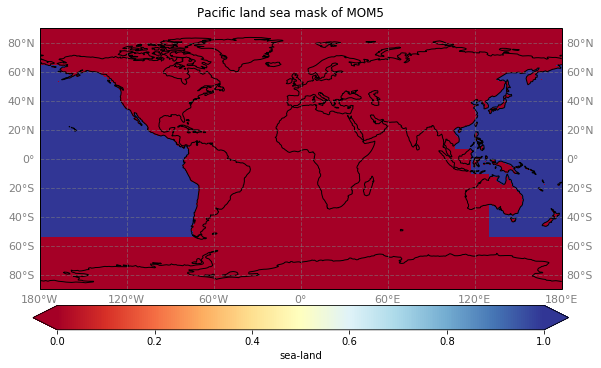

In [33]:
cube_SODA3_pacific = iris.cube.Cube(tmaskpac_SODA3,long_name='Pacific land sea mask', var_name='mask',
                            units='1',aux_coords_and_dims=[(latitude_SODA3,(0,1)),(longitude_SODA3,(0,1))])
#print cube_SODA3
# Transform cube to target projection
cube_SODA3_pacific_regrid, extent = iris.analysis.cartography.project(cube_SODA3_pacific, ccrs.PlateCarree(), nx=1440, ny=900)
# interpolation complete!!
print (cube_SODA3_pacific_regrid)

# plot
fig6 = plt.figure(figsize=(12,6))
fig6.suptitle('Pacific land sea mask of MOM5',fontsize = 12,y=0.93)

# Set up axes
ax = plt.axes(projection=ccrs.PlateCarree())

# Set limits
ax.set_global()
#ax.set_extent([-180,180,90,90],ccrs.PlateCarree()) # East, West, South, Nouth

# adjust map by data coverage (function from matplotlib)
# could make the map an ellipse
#ax.set_aspect('auto')
ax.set_aspect('1')

# Draw coastlines
ax.coastlines()

# set gridlines and ticks
# options of crs and draw_labels only work for PlateCarree() and Mercator()
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5,linestyle='--')
gl.xlabels_top = False
gl.xlabel_style = {'size': 11, 'color': 'gray'}
#gl.xlines = False
#gl.set_xticks()
#gl.set_yticks()
gl.xformatter = LONGITUDE_FORMATTER
gl.ylabel_style = {'size': 11, 'color': 'gray'}
#ax.ylabels_left = False
gl.yformatter = LATITUDE_FORMATTER

# plot with Iris quickplot pcolormesh
#cs = iplt.pcolormesh(cube_GLORYS2V3_globe_regrid,cmap='coolwarm',vmin=0,vmax=1)
cs = iplt.pcolormesh(cube_SODA3_pacific_regrid,cmap='RdYlBu',vmin=0,vmax=1)
cbar = fig6.colorbar(cs,extend='both',orientation='horizontal',shrink =0.8,pad=0.05)
cbar.set_label('sea-land')

# show and save plot
iplt.show()
fig6.savefig(output_path + os.sep + 'pacific_mask_SODA3.jpg',dpi = 400)

Output all the mask fields into netCDF file for future use.

In [44]:
# check the type of mask files
print (type(tmaskatl_ORAS4))
print (type(tmaskatl_GLORYS2V3))
print (type(tmaskatl_SODA3))

<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ndarray'>


In [9]:
# get the dimension
y_ORCA1, x_ORCA1 = tmaskatl_ORAS4.shape
y_ORCA025, x_ORCA025 = tmaskatl_GLORYS2V3.shape
y_MOM5, x_MOM5 = tmaskatl_SODA3.shape
print (x_ORCA025)

1440


In [10]:
# pack nectcdf file
data_wrap = Dataset(output_path + os.sep + 'mask_subbasin_ORCA_MOM.nc', 'w',format = 'NETCDF4')
# create dimensions for netcdf data
lat_ORCA1_wrap_dim = data_wrap.createDimension('jj_ORCA01',y_ORCA1)
lat_ORCA025_wrap_dim = data_wrap.createDimension('jj_ORCA025',y_ORCA025)
lat_MOM5_wrap_dim = data_wrap.createDimension('jj_MOM5',y_MOM5)
lon_ORCA1_wrap_dim = data_wrap.createDimension('ji_ORCA01',x_ORCA1)
lon_ORCA025_wrap_dim = data_wrap.createDimension('ji_ORCA025',x_ORCA025)
lon_MOM5_wrap_dim = data_wrap.createDimension('ji_MOM5',x_MOM5)
# create coordinate variables for 2-dimensions
lat_ORCA1_wrap_var = data_wrap.createVariable('latitude_ORCA1',np.float32,('jj_ORCA01','ji_ORCA01'))
lat_ORCA025_wrap_var = data_wrap.createVariable('latitude_ORCA025',np.float32,('jj_ORCA025','ji_ORCA025'))
lat_MOM5_wrap_var = data_wrap.createVariable('latitude_MOM5',np.float32,('jj_MOM5','ji_MOM5'))
lon_ORCA1_wrap_var = data_wrap.createVariable('longitude_ORCA1',np.float32,('jj_ORCA01','ji_ORCA01'))
lon_ORCA025_wrap_var = data_wrap.createVariable('longitude_ORCA025',np.float32,('jj_ORCA025','ji_ORCA025'))
lon_MOM5_wrap_var = data_wrap.createVariable('longitude_MOM5',np.float32,('jj_MOM5','ji_MOM5'))
# create coordinate variables for mask
tmaskatl_ORCA1_wrap_var = data_wrap.createVariable('tmaskatl_ORCA1',np.float32,('jj_ORCA01','ji_ORCA01'))
tmaskatl_ORCA025_wrap_var = data_wrap.createVariable('tmaskatl_ORCA025',np.float32,('jj_ORCA025','ji_ORCA025'))
tmaskatl_MOM5_wrap_var = data_wrap.createVariable('tmaskatl_MOM5',np.float32,('jj_MOM5','ji_MOM5'))
tmaskpac_ORCA1_wrap_var = data_wrap.createVariable('tmaskpac_ORCA1',np.float32,('jj_ORCA01','ji_ORCA01'))
tmaskpac_ORCA025_wrap_var = data_wrap.createVariable('tmaskpac_ORCA025',np.float32,('jj_ORCA025','ji_ORCA025'))
tmaskpac_MOM5_wrap_var = data_wrap.createVariable('tmaskpac_MOM5',np.float32,('jj_MOM5','ji_MOM5'))
# global attributes
data_wrap.description = 'Land sea mask for Pacific and Atlantic basins of the curvilinear grid ORCA1 ORCA025 and MOM5.'
# variable attributes
tmaskatl_ORCA1_wrap_var.long_name = 'Land sea mask for Atlantic basin of ORCA1'
tmaskatl_ORCA025_wrap_var.long_name = 'Land sea mask for Atlantic basin of ORCA025'
tmaskatl_MOM5_wrap_var.long_name = 'Land sea mask for Atlantic basin of ORCA1'

tmaskpac_ORCA1_wrap_var.long_name = 'Land sea mask for Pacific basin of ORCA1'
tmaskpac_ORCA025_wrap_var.long_name = 'Land sea mask for Pacific basin of ORCA025'
tmaskpac_MOM5_wrap_var.long_name = 'Land sea mask for Pacific basin of MOM5'
# writing data
lat_ORCA1_wrap_var[:] = lat_ORAS4
lat_ORCA025_wrap_var[:] = lat_GLORYS2V3
lat_MOM5_wrap_var[:] = lat_SODA3
lon_ORCA1_wrap_var[:] = lon_ORAS4
lon_ORCA025_wrap_var[:] = lon_GLORYS2V3
lon_MOM5_wrap_var[:] = lon_SODA3

tmaskatl_ORCA1_wrap_var[:] = tmaskatl_ORAS4
tmaskatl_ORCA025_wrap_var[:] = tmaskatl_GLORYS2V3
tmaskatl_MOM5_wrap_var[:] = tmaskatl_SODA3
tmaskpac_ORCA1_wrap_var[:] = tmaskpac_ORAS4
tmaskpac_ORCA025_wrap_var[:] = tmaskpac_GLORYS2V3
tmaskpac_MOM5_wrap_var[:] = tmaskpac_SODA3
# close the file
data_wrap.close()
print ('Successfully create the land sea mask file for sub-basins!')